# To identify which factors predict future user adoption, you can follow these steps:

1.Clean and preprocess the data: Check for missing or invalid values in the data, and handle them appropriately. You may also want to convert the timestamp columns (creation_time and last_session_creation_time) to datetime objects for easier manipulation.

2.Identify adopted users: Group the engagement data by user and calculate the number of days each user logged in within a seven-day period. Use this information to create a new column in the users dataframe indicating whether each user is an adopted user or not.

3.Explore the data: Use the pandas library to explore the data and identify possible relationships between the adoption status and other factors such as creation source, email, mailing list opt-in, marketing drip, and organization. You can use visualizations and statistical tests to help you understand the relationships between the variables.

4.Build a model: Use machine learning techniques to build a model that predicts user adoption based on the available features. You can use scikit-learn or another library to train and evaluate the model.

5.Validate the model: Use cross-validation or another method to validate the model and ensure that it generalizes well to new data.

Conclusion:
 Summarize your findings and discuss any further research or data that could be valuable for improving the model.


The below are some of the findings in Code language.

In [75]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
     

In [76]:
df_user=pd.read_csv("takehome_users.csv",encoding='latin')

In [77]:
df_user.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [78]:
df_user.shape

(12000, 10)

In [79]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [80]:
df_user.describe()

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,12000.00000,8.823000e+03,12000.000000,12000.000000,12000.000000,6417.000000
mean,6000.50000,1.379279e+09,0.249500,0.149333,141.884583,5962.957145
std,3464.24595,1.953116e+07,0.432742,0.356432,124.056723,3383.761968
min,1.00000,1.338452e+09,0.000000,0.000000,0.000000,3.000000
25%,3000.75000,1.363195e+09,0.000000,0.000000,29.000000,3058.000000
50%,6000.50000,1.382888e+09,0.000000,0.000000,108.000000,5954.000000
75%,9000.25000,1.398443e+09,0.000000,0.000000,238.250000,8817.000000
max,12000.00000,1.402067e+09,1.000000,1.000000,416.000000,11999.000000


In [81]:
df_user.dtypes

object_id                       int64
creation_time                  object
name                           object
email                          object
creation_source                object
last_session_creation_time    float64
opted_in_to_mailing_list        int64
enabled_for_marketing_drip      int64
org_id                          int64
invited_by_user_id            float64
dtype: object

In [82]:
df_user.head(4)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0


In [83]:
df_user.isnull().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
dtype: int64

In [84]:
df_user["last_session_creation_time"].fillna(0,inplace=True)

In [85]:
df_user["invited_by_user_id"].fillna(0,inplace=True)

In [86]:
df_user.isnull().sum()

object_id                     0
creation_time                 0
name                          0
email                         0
creation_source               0
last_session_creation_time    0
opted_in_to_mailing_list      0
enabled_for_marketing_drip    0
org_id                        0
invited_by_user_id            0
dtype: int64

In [87]:
#Converting date columns to datetime objects
# df_user["creation_time"]= pd.to_datetime(df_user.creation_time)
# df_user["last_session_creation_time"] = pd.to_datetime(df_user.last_session_creation_time,unit='s')

In [88]:
df_user.dtypes

object_id                       int64
creation_time                  object
name                           object
email                          object
creation_source                object
last_session_creation_time    float64
opted_in_to_mailing_list        int64
enabled_for_marketing_drip      int64
org_id                          int64
invited_by_user_id            float64
dtype: object

In [89]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  12000 non-null  float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          12000 non-null  float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [90]:
df_user.describe(include="all")

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,12000.00000,12000,12000,12000,12000,1.200000e+04,12000.000000,12000.000000,12000.000000,12000.000000
unique,NaN,11996,11355,11980,5,NaN,NaN,NaN,NaN,NaN
top,NaN,2014-02-11 17:57:53,Araujo Gabriela,AlfieLane@yahoo.com,ORG_INVITE,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,5,2,4254,NaN,NaN,NaN,NaN,NaN
mean,6000.50000,NaN,NaN,NaN,NaN,1.014115e+09,0.249500,0.149333,141.884583,3188.691333
std,3464.24595,NaN,NaN,NaN,NaN,6.087938e+08,0.432742,0.356432,124.056723,3869.027693
min,1.00000,NaN,NaN,NaN,NaN,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,3000.75000,NaN,NaN,NaN,NaN,0.000000e+00,0.000000,0.000000,29.000000,0.000000
50%,6000.50000,NaN,NaN,NaN,NaN,1.368880e+09,0.000000,0.000000,108.000000,875.000000
75%,9000.25000,NaN,NaN,NaN,NaN,1.393729e+09,0.000000,0.000000,238.250000,6317.000000


In [91]:
df_engagement=pd.read_csv("takehome_user_engagement.csv")

In [92]:
df_engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [93]:
df_engagement.shape

(207917, 3)

In [94]:
df_engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [95]:
df_engagement.describe()

,user_id,visited
count,207917.000000,207917.0
mean,5913.314197,1.0
std,3394.941674,0.0
min,1.000000,1.0
25%,3087.000000,1.0
50%,5682.000000,1.0
75%,8944.000000,1.0
max,12000.000000,1.0


In [96]:
df_engagement.dtypes

time_stamp    object
user_id        int64
visited        int64
dtype: object

In [97]:
df_engagement.isnull().sum()

time_stamp    0
user_id       0
visited       0
dtype: int64

In [98]:
# Defining adopted users

df_engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [99]:
df_engagement["visited"].value_counts()

1    207917
Name: visited, dtype: int64

In [100]:
print("unique user id present in engagement_user is ",len(df_engagement["user_id"].unique()))

unique user id present in engagement_user is  8823


In [101]:
df_user.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [102]:
df = df_user.email.value_counts().to_frame()
temp_list = list(df[df.email==2].index)
df_user[df_user.email.isin(temp_list)].sort_values(by='email').head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
1603,1604,2014-02-03 04:48:08,Lane Alfie,AlfieLane@yahoo.com,ORG_INVITE,1.391662e+09,0,0,0,4128.0
3822,3823,2012-11-22 05:51:29,Lane Alfie,AlfieLane@yahoo.com,ORG_INVITE,1.353650e+09,0,0,169,9498.0
5280,5281,2012-09-29 11:54:08,Bach Amanda,AmandaABach@gmail.com,SIGNUP_GOOGLE_AUTH,1.401883e+09,0,0,146,0.0
9040,9041,2013-01-03 00:53:47,Bach Amanda,AmandaABach@gmail.com,ORG_INVITE,0.000000e+00,0,0,377,6208.0
375,376,2012-08-10 22:27:08,Tye Jacob,JacobTye@gmail.com,SIGNUP_GOOGLE_AUTH,1.344638e+09,1,0,104,0.0


In [103]:
df["email"].value_counts().to_frame()

,email
1,11960
2,20


In [104]:
temp_list[:5]

['AlfieLane@yahoo.com',
 'LasseLNrgaard@gmail.com',
 'AmandaABach@gmail.com',
 'PaigeWyatt@gmail.com',
 'TomSchiffer@gmail.com']

In [105]:
df[df["email"]==2].head()

,email
AlfieLane@yahoo.com,2
LasseLNrgaard@gmail.com,2
AmandaABach@gmail.com,2
PaigeWyatt@gmail.com,2
TomSchiffer@gmail.com,2


In [106]:
df_engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [107]:
# As the visited column has same value, we can drop it.
df_engagement.drop(["visited"],axis=1,inplace=True)

In [108]:
df_engagement.dtypes

time_stamp    object
user_id        int64
dtype: object

In [109]:
df_engagement["time_stamp"]= pd.to_datetime(df_engagement.time_stamp)

In [110]:
df_engagement.dtypes

time_stamp    datetime64[ns]
user_id                int64
dtype: object

In [111]:
# Adding org_size for knowing the no of users in oraganization
temp = df_user.org_id.value_counts()
df_user['org_size'] = [temp[i] for i in df_user.org_id]

# Adding referred to know whether the user was invited to sign then true else false.
df_user['referred'] = df_user.invited_by_user_id!=0

df_user.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,org_size,referred
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,75,True
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,233,True
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,32,True
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,233,True
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,16,True


In [112]:
# df_user["invited_by_user_id"]!=0

**An "adopted user" is a user who has logged into the product on three separate days in at least one seven-day period. We will add a column for adopted user with boolean values - True for adopted user, False otherwise.**

In [113]:
df_engagement.head()

,time_stamp,user_id
0,2014-04-22 03:53:30,1
1,2013-11-15 03:45:04,2
2,2013-11-29 03:45:04,2
3,2013-12-09 03:45:04,2
4,2013-12-25 03:45:04,2


In [114]:
def get_visit_count(grp, freq):
    return grp.rolling(freq, on='time_stamp')['user_id'].count()

df_engagement['7_day_visit'] = df_engagement.groupby('user_id', as_index=False, group_keys=False).apply(get_visit_count, '7D')

# Creating a data frame with adopted_user status against the user_id
df_adopted = df_engagement.groupby('user_id')['7_day_visit'].max().to_frame().reset_index()
df_adopted['adopted_user'] = (df_adopted['7_day_visit']>2)

In [115]:
df_adopted.head()

,user_id,7_day_visit,adopted_user
0,1,1.0,False
1,2,3.0,True
2,3,1.0,False
3,4,1.0,False
4,5,1.0,False


In [116]:
df = pd.merge(df_user,df_adopted,how='outer',left_on='object_id',right_on='user_id').drop(['user_id','7_day_visit'],axis=1)
     

In [117]:
df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,org_size,referred,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,75,True,False
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,233,True,True
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,32,True,False
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,233,True,False
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,16,True,False


In [118]:
df.adopted_user.isnull().sum()

3177

In [119]:
df.adopted_user.fillna(False,inplace=True)

# Adding one more column for checking if the reference user is adopted
df = pd.merge(df,df[['object_id','adopted_user']], how='left',left_on='invited_by_user_id',right_on='object_id')
df.drop('object_id_y',axis=1,inplace=True)
df.rename(columns={'object_id_x':'object_id','adopted_user_x':'adopted_user','adopted_user_y':'adopted_reference'},inplace=True)
df.adopted_reference.fillna(False,inplace=True)
df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,org_size,referred,adopted_user,adopted_reference
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,75,True,False,False
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,233,True,True,False
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,32,True,False,True
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,233,True,False,True
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,16,True,False,True


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

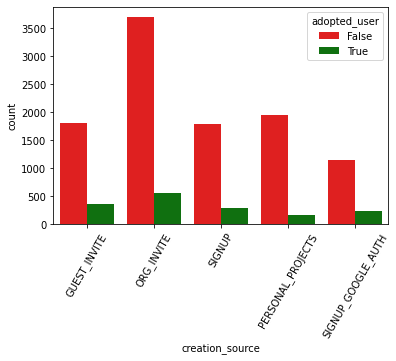

In [120]:
sns.countplot(x="creation_source", data=df,hue='adopted_user',palette=['red','green'])
plt.xticks(rotation=60)
     

In [121]:
def plot_login(df):
    login_count = df.creation_time.to_frame()
    login_count.index = login_count.creation_time
    return login_count.resample("M").count()

In [133]:
adopted_monthly_count = plot_login(df[df.adopted_user==True])
not_adopted_monthly_count = plot_login(df[df.adopted_user==False])

fig = plt.figure(figsize=(15, 5))
plt.subplot(2,1,1)
plt.plot(adopted_monthly_count)
plt.title('Number of adopted users based on account creation month')

plt.subplot(2,1,2)
plt.plot(not_adopted_monthly_count)
plt.title('Number of not adopted users based on account creation month')

plt.tight_layout()
     

AttributeError: ignored

In [126]:
df_users = pd.get_dummies(df)
df_users.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,org_size,referred,adopted_user,adopted_reference,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,1,0,11,10803.0,75,True,False,False,1,0,0,0,0
1,0,0,1,316.0,233,True,True,False,0,1,0,0,0
2,0,0,94,1525.0,32,True,False,True,0,1,0,0,0
3,0,0,1,5151.0,233,True,False,True,1,0,0,0,0
4,0,0,193,5240.0,16,True,False,True,1,0,0,0,0


In [127]:
X = df_users.drop(labels=['adopted_user'],axis=1)
y = df_users.adopted_user

In [128]:

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Applying SelectKBest class to score the 12 features
bestfeatures = SelectKBest(score_func=chi2, k=12)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

# Concatenating two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
print(featureScores.nlargest(12,'Score'))

                                 Specs         Score
3                   invited_by_user_id  26272.387638
4                             org_size   6142.446090
2                               org_id   5418.462606
9    creation_source_PERSONAL_PROJECTS     56.844560
6                    adopted_reference     49.064999
7         creation_source_GUEST_INVITE     20.283149
11  creation_source_SIGNUP_GOOGLE_AUTH     13.848040
5                             referred      4.274697
10              creation_source_SIGNUP      0.857191
0             opted_in_to_mailing_list      0.590515
8           creation_source_ORG_INVITE      0.451700
1           enabled_for_marketing_drip      0.220970


[0.01892865 0.01789326 0.39046441 0.28250182 0.26389273 0.00090786
 0.00892412 0.00316416 0.00254197 0.00701562 0.0014224  0.00234299]


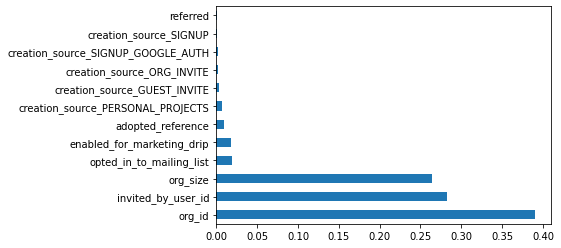

In [129]:

from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)

# Plotting graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

**From the above 2 methods, the 3 most important features are the organization they belong to,organization size and invited_by_user.**

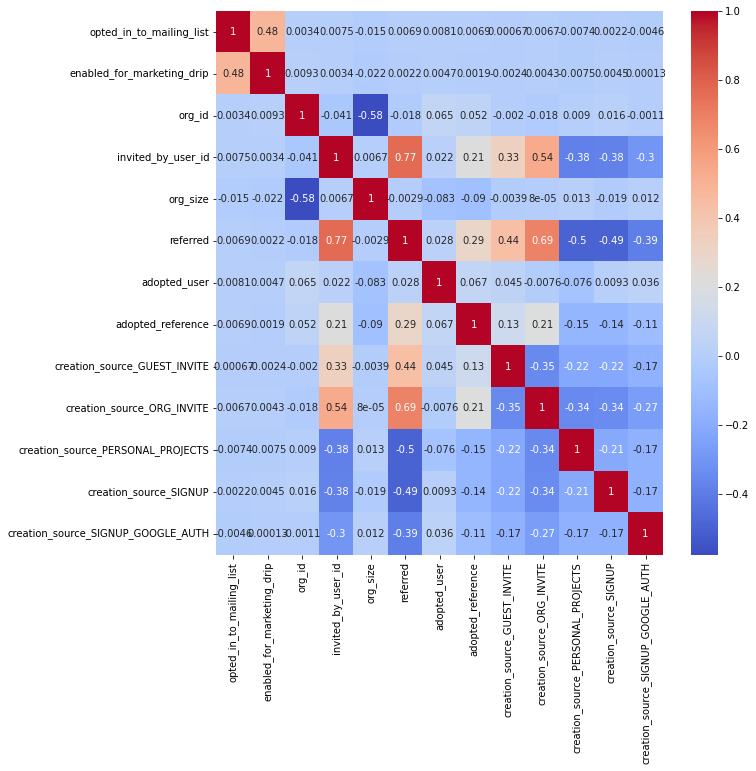

In [130]:
#get correlations of each features in dataset
corrmat = df_users.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(df_users[top_corr_features].corr(),annot=True,cmap="coolwarm")

In [131]:
from scipy import stats

# Function for calculating p-value matrix for multiple variables

def calculate_pvalues(df):
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            df_clean = df.loc[:,[r,c]].dropna()
            pvalues[r][c]=round(stats.spearmanr(df_clean.iloc[:,0], df_clean.iloc[:,1])[1], 4)
    return pvalues

calculate_pvalues(df_users)

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,org_size,referred,adopted_user,adopted_reference,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
opted_in_to_mailing_list,0.0,0.0,0.5128,0.3912,0.4037,0.4476,0.3751,0.4497,0.9418,0.4634,0.4156,0.8112,0.6178
enabled_for_marketing_drip,0.0,0.0,0.2437,0.7302,0.3043,0.8082,0.6103,0.8322,0.7894,0.64,0.4102,0.6199,0.9889
org_id,0.5128,0.2437,0.0,0.0023,0.0,0.1445,0.0,0.0,0.9867,0.1315,0.6484,0.0563,0.5964
invited_by_user_id,0.3912,0.7302,0.0023,0.0,0.0129,0.0,0.0053,0.0,0.0,0.0,0.0,0.0,0.0
org_size,0.4037,0.3043,0.0,0.0129,0.0,0.1256,0.0,0.0,0.9147,0.0923,0.9442,0.0144,0.6689
referred,0.4476,0.8082,0.1445,0.0,0.1256,0.0,0.0024,0.0,0.0,0.0,0.0,0.0,0.0
adopted_user,0.3751,0.6103,0.0,0.0053,0.0,0.0024,0.0,0.0,0.0,0.4029,0.0,0.3084,0.0001
adopted_reference,0.4497,0.8322,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
creation_source_GUEST_INVITE,0.9418,0.7894,0.9867,0.0,0.9147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
creation_source_ORG_INVITE,0.4634,0.64,0.1315,0.0,0.0923,0.0,0.4029,0.0,0.0,0.0,0.0,0.0,0.0


From the above heatmap, and the p-values, the important features are org_id, org_size, invited_by_user_id, referred, adopted_reference, creation_source_PERSONAL_PROJECTS.

so we can conclude that the most important features are org_id, org_size, invited_by_user_id.